Train on 1014 samples, validate on 1014 samples
Epoch 1/10
1014/1014 [==============================] - 26s 26ms/step - loss: 2.2687 - acc: 0.1588 - val_loss: 2.1565 - val_acc: 0.2130
Epoch 2/10
1014/1014 [==============================] - 18s 17ms/step - loss: 2.0955 - acc: 0.2761 - val_loss: 1.9954 - val_acc: 0.4132
Epoch 3/10
1014/1014 [==============================] - 18s 17ms/step - loss: 1.9535 - acc: 0.4527 - val_loss: 1.8695 - val_acc: 0.6489
Epoch 4/10
1014/1014 [==============================] - 18s 17ms/step - loss: 1.8287 - acc: 0.5957 - val_loss: 1.7790 - val_acc: 0.4527
Epoch 5/10
1014/1014 [==============================] - 18s 17ms/step - loss: 1.7317 - acc: 0.5680 - val_loss: 1.6562 - val_acc: 0.5582
Epoch 6/10
1014/1014 [==============================] - 18s 17ms/step - loss: 1.6117 - acc: 0.6588 - val_loss: 1.5559 - val_acc: 0.6884
Epoch 7/10
1014/1014 [==============================] - 18s 17ms/step - loss: 1.5110 - acc: 0.7239 - val_loss: 1.4807 - val_acc: 0.5740


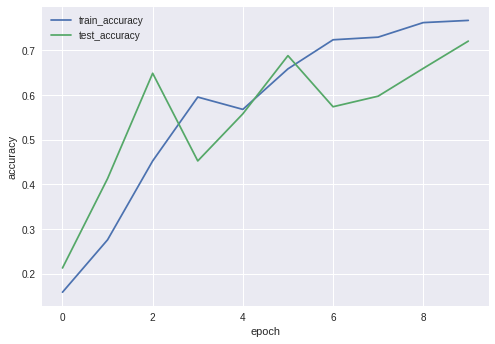

Train on 1014 samples, validate on 1014 samples
Epoch 1/10
1014/1014 [==============================] - 19s 19ms/step - loss: 1.1575 - val_loss: 1.1793
Epoch 2/10
1014/1014 [==============================] - 18s 18ms/step - loss: 1.1017 - val_loss: 1.1259
Epoch 3/10
1014/1014 [==============================] - 18s 18ms/step - loss: 1.0451 - val_loss: 1.0812
Epoch 4/10
1014/1014 [==============================] - 18s 18ms/step - loss: 0.9913 - val_loss: 1.0370
Epoch 5/10
1014/1014 [==============================] - 18s 18ms/step - loss: 0.9446 - val_loss: 0.9973
Epoch 6/10
1014/1014 [==============================] - 18s 18ms/step - loss: 0.9038 - val_loss: 0.9691
Epoch 7/10
1014/1014 [==============================] - 18s 18ms/step - loss: 0.8695 - val_loss: 0.9395
Epoch 8/10
1014/1014 [==============================] - 18s 18ms/step - loss: 0.8395 - val_loss: 0.9155
Epoch 9/10
1014/1014 [==============================] - 18s 18ms/step - loss: 0.8132 - val_loss: 0.8930
Epoch 10/10
1014

In [5]:
#members: Enlin Chen B00725769
#         Jun Guo    B00697484
#implement VGG16 model under lots of help from TA: Yoshimasa Kubo
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers, optimizers, datasets, utils, losses
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.models import Model,Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Input,Flatten
from keras import backend as K
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras import utils
from keras.optimizers import SGD
#import cv2 <----pretty expensive
from cv2 import cvtColor, resize, COLOR_GRAY2BGR


def show_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

nb_data_size = 1014
nb_classes   = 10

#load data for VGG16 
#modify the size of dataset in order to fit into VGG16 model and normalization dataset to range [0,1]
x_train = [cvtColor(resize(i,(224,224)), COLOR_GRAY2BGR) for i in x_train[:nb_data_size]]
x_train = np.concatenate([arr[np.newaxis] for arr in x_train]).astype('float32')

x_test  = [cvtColor(resize(i,(224,224)), COLOR_GRAY2BGR) for i in x_test[:nb_data_size] ]
x_test  = np.concatenate([arr[np.newaxis] for arr in x_test] ).astype('float32')
#normalization
x_train /= 255
x_test /= 255

y_train_one = utils.to_categorical(y_train[:nb_data_size], nb_classes)
y_test_one  = utils.to_categorical(y_test[:nb_data_size], nb_classes)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(224, activation='relu')(x)
# and a logistic layer 
predictions = Dense(10, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)
    
#freeze all layers except the top layer   
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model on the new data for a few epochs
VGG16 = model.fit(x_train, y_train_one,batch_size = 128, epochs = 10, validation_data=(x_test, y_test_one))

score = model.evaluate(x_test, y_test_one, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

show_history(VGG16)

#retrain more layers
for layer in model.layers[:15]:
   layer.trainable = False
for layer in model.layers[16:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

VGG16_a = model.fit(x_train,y_train_one,batch_size = 128, epochs = 10, validation_data=(x_test, y_test_one))
#---------------------------------------------------------------------------#

score_1 = model.evaluate(x_test, y_test_one, verbose=0)

#print('Test loss:', score_1[0])
#print('Test accuracy:', score_1[1])

print(score_1)


#Conclusion: 
#When just training using the top layers, the accuracy we get is 79-80%
#on 1024 images. Then, we fine-tuning the VGG16 model by freezing some
#other layers and retrain the model. Finally, we get a higher accuracy 
#which is around 88%. To sum up, to the fine-tuning the model, we need 
#to train the model layers one by one so that we can get a higher accuracy
#prediction. 